In the problem it is given that,

$\frac{d^2x}{dt^2}=2(\frac{dy}{dt}sin(\psi)-\frac{dz}{dt}cos(\psi))$

$\frac{d^2y}{dt^2}=\frac{\hat R}{2}sin(2\psi)-2\frac{dy}{dt}sin(\psi)$

$\frac{d^2z}{dt^2}=-1+\hat R cos^2(\psi)+2\frac{dx}{dt}cos(\psi)$

We can convert these second order differential equations to first order diferential equations.

Let $m_1=\frac{dx}{dt}$ , $m_2=\frac{dy}{dt}$ and $m_3=\frac{dz}{dt}$

$\frac{dm_1}{dt}=2(m_2sin(\psi)-m_3cos(\psi))$

$\frac{dm_2}{dt}=\frac{\hat R}{2}sin(2\psi)-2m_2sin(\psi)$

$\frac{dm_3}{dt}=-1+\hat R cos^2(\psi)+2m_1cos(\psi)$

First import all the packages necessary for the program.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Next introduce all the variables in the problem

In [2]:
omega = 7.292e-5 #omega in 1/seconds
g = 9.8          # graviataional acceleration in m/s/s
h = 100          #initial height in m
R = 6371e3
psi = 42*(np.pi/180) #lattilude of Ames

Next define unit Length

In [3]:
L=g/(omega**2) #Length unit

r=R/L          #convert R to length units

Then calculate the total time of the flight motion in units of $\frac{1}{\omega}$

In [4]:
t_limt = np.sqrt(2*h/g)*omega

Next define the ODE's to solve

In [5]:
def solve(m,t):
    
    m_1 = m[1]            #m[0]-x coordinate, m[1]-V_x, m[2]=y, m[3]=V_y, m[4]=z and m[5]=V_z 
    m_2 = m[3]
    m_3 = m[5]

    
    dm_1dt=2*(m_2*np.sin(psi)-m_3*np.cos(psi))
    dm_2dt=(r/2)*np.sin(2*psi)-2*m_2*np.sin(psi)
    dm_3dt=-1+r*(np.cos(psi))**2+2*m_1*np.cos(psi)
    
    
    return[m_1,dm_1dt,m_2,dm_2dt,m_3,dm_3dt]


After that let's define initial conditions and time array

In [6]:
m_i =[0,0,0,0,h/L,0] # initial positions and velocities of the object x,V_x,y,V_y and z,V_z

t = np.linspace(0,t_limt,100)

Let's solve the ODE's

In [7]:
m = odeint(solve,m_i,t)

Let's plot how three velocities  and displacements change over time

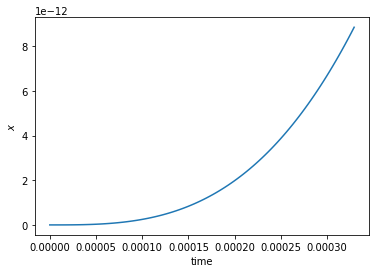

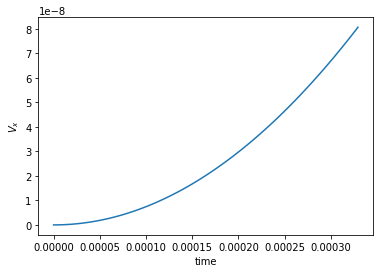

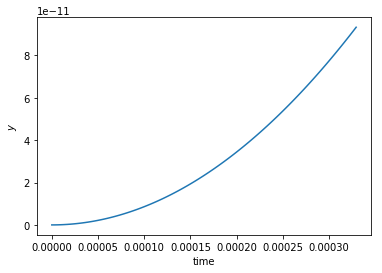

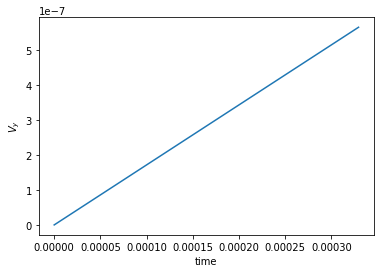

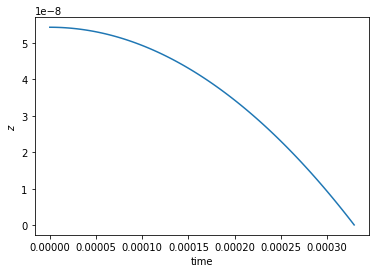

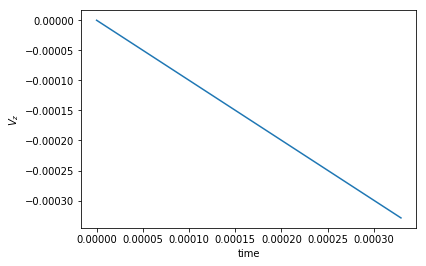

In [8]:
plt.plot(t,m[:,0])         # x coordinate and time
plt.xlabel('time')
plt.ylabel('$x$')
plt.show()

plt.plot(t,m[:,1])         # velocity in x direction and time     
plt.xlabel('time')
plt.ylabel('$V_x$')
plt.show()

plt.plot(t,m[:,2])         # y coordinate and time
plt.xlabel('time')
plt.ylabel('$y$')
plt.show()

plt.plot(t,m[:,3])         # velocity in y direction and time     
plt.xlabel('time')
plt.ylabel('$V_y$')
plt.show()

plt.plot(t,m[:,4])         # z coordinate and time
plt.xlabel('time')
plt.ylabel('$z$')
plt.show()

plt.plot(t,m[:,5])         # velocity in z direction and time     
plt.xlabel('time')
plt.ylabel('$V_z$')
plt.show()

Now lets calculate the decflection in x direction

In [9]:
print('The deflection is',m[-1,0]*L, 'in meters (1.63 cm)' )

The deflection is 0.0163137802501 in meters (1.63 cm)


lets calculate the deflection using the approximation

In [10]:
time = np.sqrt(200/9.8)
x = (omega*g/3)*(time**3)* np.sin(psi)
print('The deflection is',x ,'in meters (1.47cm)')

The deflection is 0.0146949548513 in meters (1.47cm)


The approximation is off by 0.16 cm which is quite small